In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

# Figures inline and set visualization style
%matplotlib inline #displays figures in line with the code instead of in a file
sns.set() #brings the default settings of seaborn for visualization


UsageError: unrecognized arguments: #displays figures in line with the code instead of in a file


In [60]:
# Path to data
data = '/Users/astrid/Documents/Machine_learning/machine-learning-ex1/ex1/ex1data1.txt'
df = pd.read_csv(data,header=None)
df.columns=['population','profit']
df.head()
df.shape

(97, 2)

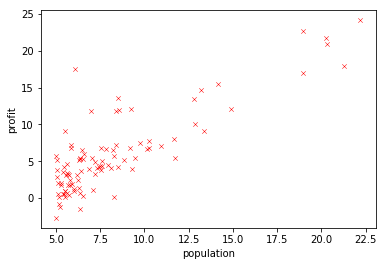

In [55]:
# Plot the data
df.plot('population','profit',marker='x',c='r',linewidth=0.5,kind='scatter')
plt.show()

In [279]:
# Create matrix X with population
X = df.population.values
X = np.expand_dims(X,axis=1)
# Create a column of ones to the begining of the matrix
# add the ones to the X matrix
X = np.insert(X,0,1.0,axis=1)
theta = np.zeros((2,1))
# create the y matrux with profit
y = df.profit.values
y = np.expand_dims(y,axis=1)


# Some gradient descent settings
iterations = 1500
alpha = 0.01


In [245]:
# implement the Cost function
def compute_cost(X,y,theta):   
    m = y.size
    J= np.sum((np.square(np.dot(X,theta)- y))/(2*m))
    return J

In [246]:
compute_cost(X,y,theta)

32.072733877455676

In [179]:
# testing other values
theta=([[-1],[2]])

In [180]:
compute_cost(X,y,theta)

54.24245508201237

In [280]:
# Implement gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        theta = theta - np.dot(alpha,(np.dot((1/m),np.transpose(np.dot((np.transpose(np.dot(X,theta)- y)),X)))))
        J_history[i,0] = compute_cost(X, y, theta)
    return theta                                     
    

In [281]:
optimised_theta = gradient_descent(X, y, theta, alpha, iterations)
optimised_theta

array([[-3.63029144],
       [ 1.16636235]])

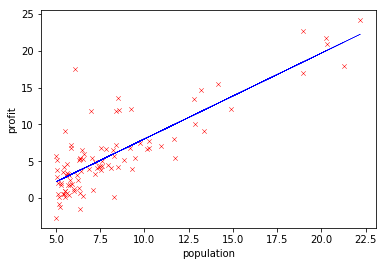

In [282]:
# Plot the linear fit
df.plot('population','profit',marker='x',c='r',linewidth=0.5,kind='scatter')
plt.plot(X[:,1],np.dot(X,optimised_theta),c='b',linewidth=0.5)
plt.show()

In [335]:
# Visualizing J(theta_0, theta_1)
# Create grid
theta_zero = np.arange(-10,10,0.2)
theta_one = np.arange(-1,4,0.05)

cost_array = np.zeros((100,100))

# Calculating the cost
for i in range(theta_zero.size):
    for j in range(theta_one.size):
        t = np.expand_dims((theta_zero[i],theta_one[j]),axis=1)
        cost_array[i,j]= compute_cost(X, y, t)

theta_zero, theta_one = np.meshgrid(theta_zero, theta_one)

In [295]:
compute_cost(X,y,optimised_theta)

4.483388256587725

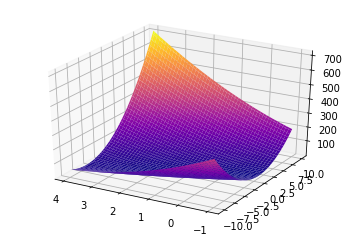

In [336]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta_one, theta_zero, cost_array, cmap='plasma')
plt.gca().invert_xaxis()

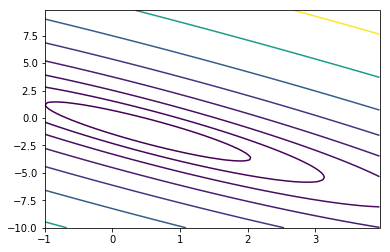

In [331]:
# Contour plot
plt.contour(theta_one, theta_zero, cost_array, np.logspace(-2,3,20));